In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def get_num_of_nsrf(pattern):
    assert len(pattern)==6    
    retVal=0
    for i in range(6):
        if pattern[i]=='1':
            retVal+=1
    return retVal

In [3]:
filename="transition_degenerate.csv"
df=pd.read_csv(filename,dtype={'idx':str})
df=df.set_index('idx')        
df.head()

,000000,100000,110000,100100,100010,100001,111000,110100,110010,110001,111100,110110,110011,110101,111110,111111
idx,,,,,,,,,,,,,,,,
000000,1168749,167891,2667,1204,2970,5319,12,138,72,94,0,0,0,0,0,0
100000,242112,693752,50656,168736,5829,32900,489,21132,7302,1347,324,202,115,602,0,0
110000,11784,110422,17660,35956,1048,6967,365,6828,2870,650,76,343,191,18,0,0
100100,5851,272152,21398,135052,940,14809,464,14822,5301,500,330,168,0,289,0,0
100010,18190,23043,2534,1769,3906,2415,18,676,369,488,34,10,123,1,0,0


In [9]:
total=np.sum(np.sum(df))
for idx in df.index:
    for clm in df.columns:
        dif=get_num_of_nsrf(idx)-get_num_of_nsrf(clm)
        df.loc[idx,clm]=df.loc[idx,clm]*dif/total
df.head()

,000000,100000,110000,100100,100010,100001,111000,110100,110010,110001,111100,110110,110011,110101,111110,111111
idx,,,,,,,,,,,,,,,,
000000,0.000000,-0.045486,-0.001445,-0.000652,-0.001609,-0.002882,-0.000010,-0.000112,-0.000059,-0.000076,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0,-0.0
100000,0.065594,0.000000,-0.013724,-0.045715,-0.001579,-0.008913,-0.000265,-0.011450,-0.003957,-0.000730,-0.000263,-0.000164,-0.000093,-4.892878e-04,-0.0,-0.0
110000,0.006385,0.029916,0.000000,0.000000,0.000000,0.000000,-0.000099,-0.001850,-0.000778,-0.000176,-0.000041,-0.000186,-0.000103,-9.753246e-06,-0.0,-0.0
100100,0.003170,0.073732,0.000000,0.000000,0.000000,0.000000,-0.000126,-0.004016,-0.001436,-0.000135,-0.000179,-0.000091,-0.000000,-1.565938e-04,-0.0,-0.0
100010,0.009856,0.006243,0.000000,0.000000,0.000000,0.000000,-0.000005,-0.000183,-0.000100,-0.000132,-0.000018,-0.000005,-0.000067,-5.418470e-07,-0.0,-0.0


In [15]:
sym_df=pd.DataFrame(0,index=df.index, columns=df.columns)
for i in range(df.shape[0]):
    for j in range(i):
        sym_df.iloc[i,j]=df.iloc[i,j]+df.iloc[j, i]

In [16]:
sym_df

,000000,100000,110000,100100,100010,100001,111000,110100,110010,110001,111100,110110,110011,110101,111110,111111
idx,,,,,,,,,,,,,,,,
000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
100000,0.020108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
110000,0.004940,0.016192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
100100,0.002518,0.028018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
100010,0.008247,0.004664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
100001,0.000601,-0.002052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
111000,0.000157,0.000781,0.000084,0.000038,-0.000003,0.000108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
110100,0.000602,0.006811,-0.000236,0.000029,-0.000097,0.001769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0
110010,0.001986,0.051734,0.002930,0.013424,0.000220,0.001092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0


* Alistipes finegoldii(679935)

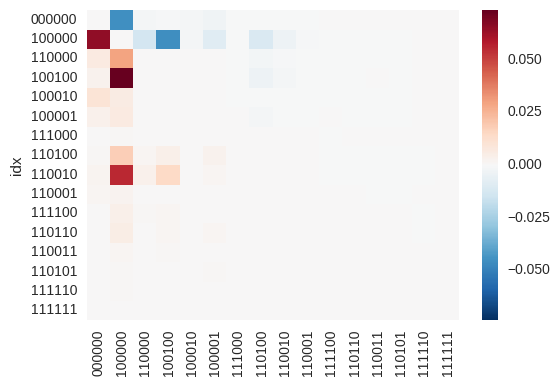

In [17]:
sns.heatmap(df)

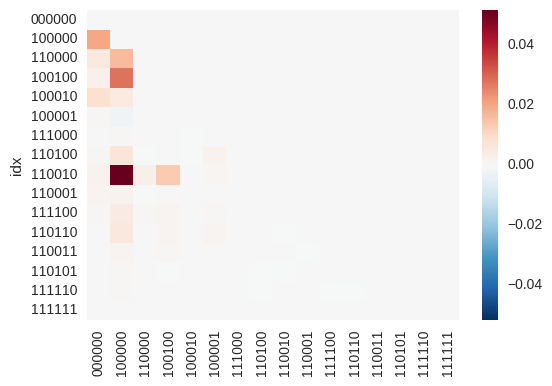

In [18]:
sns.heatmap(sym_df)